In [188]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [189]:
#importing the training set
train_data = pd.read_csv('credit_train.csv')
train_data.head(2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0


In [190]:
#shape of training dataset
train_data.shape

(100514, 19)

Note: The training dataset google sheet is having only 100000 samples,   all the last 514 rows are filled with NULL values as default,    so to reduce the error it's better to remove the last 514 NULL rows 

In [191]:
#removing the last 514 rows from the training dataset
lister = [x for x in range(100000,100514)]
train_data.drop(lister,inplace = True)
print(train_data.shape)

(100000, 19)


In [192]:
# training set data analysis
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null 

In [193]:
#checking the NULL values in each column
train_data.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [194]:
#importing the test data
test_data = pd.read_csv('credit_test.csv')
test_data.head(2)

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0


In [195]:
# checking the shape of test data
test_data.shape

(10353, 18)

Note: The test dataset google sheet is having only 10,000 samples, all the last 353 rows are filled with NULL values as default, so to reduce the error it's better to remove the last 352 NULL rows.

In [196]:
#removing the last 352 rows from the test dataset
lister = [x for x in range(10000,10353)]
test_data.drop(lister,inplace = True)
print(test_data.shape)

(10000, 18)


In [197]:
#test set data analysis
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Customer ID                   10000 non-null  object 
 2   Current Loan Amount           10000 non-null  float64
 3   Term                          10000 non-null  object 
 4   Credit Score                  8019 non-null   float64
 5   Annual Income                 8019 non-null   float64
 6   Years in current job          9573 non-null   object 
 7   Home Ownership                10000 non-null  object 
 8   Purpose                       10000 non-null  object 
 9   Monthly Debt                  10000 non-null  float64
 10  Years of Credit History       10000 non-null  float64
 11  Months since last delinquent  4694 non-null   float64
 12  Number of Open Accounts       10000 non-null  float64
 13  Nu

In [198]:
#checking the NULL values in each column
test_data.isnull().sum()

Loan ID                            0
Customer ID                        0
Current Loan Amount                0
Term                               0
Credit Score                    1981
Annual Income                   1981
Years in current job             427
Home Ownership                     0
Purpose                            0
Monthly Debt                       0
Years of Credit History            0
Months since last delinquent    5306
Number of Open Accounts            0
Number of Credit Problems          0
Current Credit Balance             0
Maximum Open Credit                0
Bankruptcies                      22
Tax Liens                          1
dtype: int64

DIMENTIONALITY REDUCTION

In [199]:
# Reducing the number of columns by observing the Corelation matrix
train_data.corr()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.096652,0.013112,-0.006643,0.019282,0.011248,0.001478,-0.002795,0.003880,-0.001271,-0.000608,-0.002048
Credit Score,-0.096652,1.000000,-0.017078,-0.001674,-0.009720,-0.003739,0.006435,-0.003022,-0.000104,-0.002827,-0.006935,0.005146
Annual Income,0.013112,-0.017078,1.000000,0.485230,0.161669,-0.077577,0.146175,-0.017006,0.312340,0.053064,-0.047672,0.040167
Monthly Debt,-0.006643,-0.001674,0.485230,1.000000,0.199289,-0.056818,0.411353,-0.055383,0.481348,0.039268,-0.078979,0.020119
Years of Credit History,0.019282,-0.009720,0.161669,0.199289,1.000000,-0.044292,0.132349,0.061588,0.208470,0.031124,0.066247,0.017245
Months since last delinquent,0.011248,-0.003739,-0.077577,-0.056818,-0.044292,1.000000,-0.032569,0.104642,-0.028662,-0.008785,0.123951,0.012624
Number of Open Accounts,0.001478,0.006435,0.146175,0.411353,0.132349,-0.032569,1.000000,-0.013995,0.228136,0.031341,-0.024575,0.006545
Number of Credit Problems,-0.002795,-0.003022,-0.017006,-0.055383,0.061588,0.104642,-0.013995,1.000000,-0.112516,-0.012072,0.752942,0.581290
Current Credit Balance,0.003880,-0.000104,0.312340,0.481348,0.208470,-0.028662,0.228136,-0.112516,1.000000,0.139204,-0.122603,-0.015645
Maximum Open Credit,-0.001271,-0.002827,0.053064,0.039268,0.031124,-0.008785,0.031341,-0.012072,0.139204,1.000000,-0.014574,-0.001029


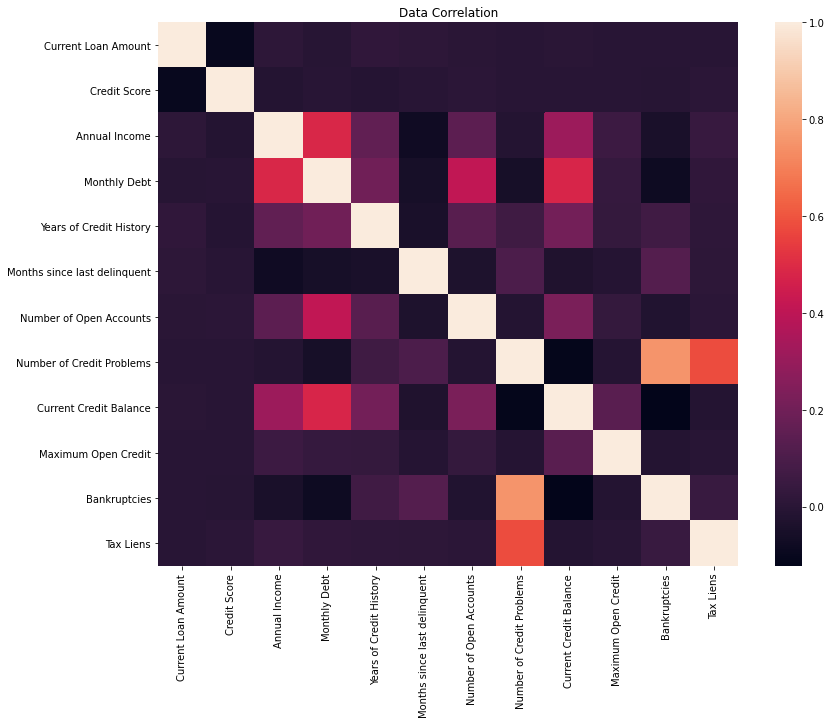

In [200]:
#Now let's draw a heatmap to have an idea about the correlation
import seaborn as sns
plt.figure(figsize=(13,10))
plt.title("Data Correlation")
sns.heatmap(train_data.corr())

Text(0, 0.5, 'Count')

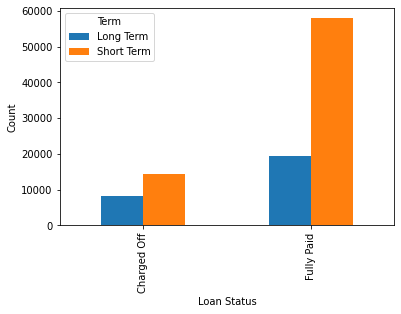

In [201]:
# making a analysis between Loan Status and Term
pd.crosstab(index=train_data['Loan Status'],columns=train_data['Term']).plot(kind='bar')
plt.ylabel('Count')

Observation from the above graph is : Most of the customers who took the short term loan paid completly.

<Figure size 2880x1440 with 0 Axes>

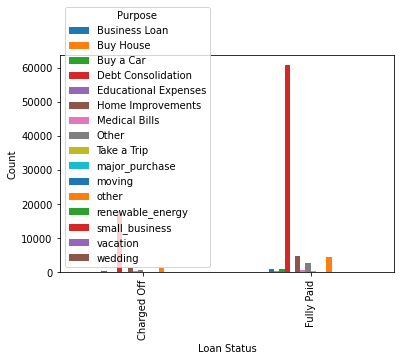

<Figure size 2880x1440 with 0 Axes>

In [202]:
# making a analysis between Loan Status and Purpose
pd.crosstab(index=train_data['Loan Status'],columns=train_data['Purpose']).plot(kind='bar')
plt.ylabel('Count')
plt.figure(figsize=(40,20))

most of the customers who took loan for small business paid completly.

<Figure size 2880x1440 with 0 Axes>

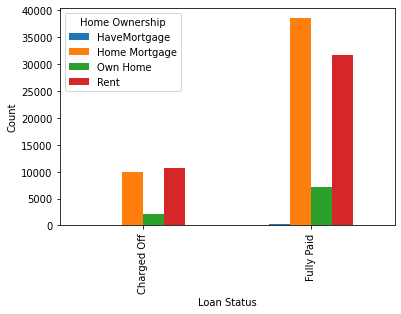

<Figure size 2880x1440 with 0 Axes>

In [203]:
# making a analysis between Loan Status and Home Ownership
pd.crosstab(index=train_data['Loan Status'],columns=train_data['Home Ownership']).plot(kind='bar')
plt.ylabel('Count')
plt.figure(figsize=(40,20))

In [204]:
# removing some columns from training and test datsets 
train_data = train_data.drop(columns = ['Loan ID','Customer ID','Years in current job'])
test_data = test_data.drop(columns = ['Loan ID','Customer ID','Years in current job'])

In [205]:
#shape of the datasets after deleting the columns
print(train_data.shape)
print(test_data.shape)

(100000, 16)
(10000, 15)


Note : In the datasets some columns are Categorical data so those columns must be converted into numbered data.........this can be done just by mapping those strings to numbers.

CONVERTING THE CATEGORICAL DATA INTO NORMAL NUMBERED DATA IN BOTH TRAIN AND TEST DATASETS

In [206]:
#mapping the categorical data in training dataset 
train_data['Purpose'] = train_data['Purpose'].map({'Home Improvements':0 , 'Debt Consolidation':1 , 'Buy House':2,'other':3,'Business Loan':4, 'Buy a Car':5, 'major_purchase':6, 'Take a Trip':7,
       'Other':8, 'small_business':9, 'Medical Bills':10, 'wedding':11, 'vacation':12,
       'Educational Expenses':13, 'moving':14, 'renewable_energy':15})

train_data['Home Ownership'] = train_data['Home Ownership'].map({'Home Mortgage':0, 'Own Home':1, 'Rent':2, 'HaveMortgage':3})

train_data['Term'] = train_data['Term'].map({'Short Term':0,'Long Term':1})

train_data['Loan Status'] = train_data['Loan Status'].map({'Fully Paid':0 , 'Charged Off':1}) 

#mapping the categorical data in test dataset

test_data['Purpose'] = test_data['Purpose'].map({'Home Improvements':0 , 'Debt Consolidation':1 , 'Buy House':2,'other':3,'Business Loan':4, 'Buy a Car':5, 'major_purchase':6, 'Take a Trip':7,
       'Other':8, 'small_business':9, 'Medical Bills':10, 'wedding':11, 'vacation':12,
       'Educational Expenses':13, 'moving':14, 'renewable_energy':15})

test_data['Home Ownership'] = test_data['Home Ownership'].map({'Home Mortgage':0, 'Own Home':1, 'Rent':2, 'HaveMortgage':3})

test_data['Term'] = test_data['Term'].map({'Short Term':0,'Long Term':1})



Note : NULL values are present in both training and test datasets.....so filling of those NULL values should be done before training with the algorithms


Note: NULL values of categorical data columns should be filled with MODE and the NULL values in numbered data columns should be filled with MEAN. 

FILLING THE NULL VALUES IN TRAINING DATASET

In [207]:
# filling the NULL values in Numbered data columns using mean function
train_data['Credit Score'] = train_data['Credit Score'].fillna(train_data['Credit Score'].mean())
train_data['Annual Income'] = train_data['Annual Income'].fillna(train_data['Annual Income'].mean())
train_data['Months since last delinquent'] = train_data['Months since last delinquent'].fillna(train_data['Months since last delinquent'].mean())
train_data['Maximum Open Credit'] = train_data['Maximum Open Credit'].fillna(train_data['Maximum Open Credit'].mean())
train_data['Bankruptcies'] = train_data['Bankruptcies'].fillna(train_data['Bankruptcies'].mean())
train_data['Tax Liens'] = train_data['Tax Liens'].fillna(train_data['Tax Liens'].mean())



In [208]:
train_data.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

FILLING THE NULL VALUES IN TEST DATASET

In [209]:
# filling the NULL values in Numbered data columns using mean function
test_data['Credit Score'] = test_data['Credit Score'].fillna(test_data['Credit Score'].mean())
test_data['Annual Income'] = test_data['Annual Income'].fillna(test_data['Annual Income'].mean())
test_data['Months since last delinquent'] = test_data['Months since last delinquent'].fillna(test_data['Months since last delinquent'].mean())
test_data['Bankruptcies'] = test_data['Bankruptcies'].fillna(test_data['Bankruptcies'].mean())
test_data['Tax Liens'] = test_data['Tax Liens'].fillna(test_data['Tax Liens'].mean())



In [210]:
test_data.isnull().sum()

Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

Now after using 'fillna' function both Training and test datasets are having zero NULL values.

DIVIDING THE COLUMNS INTO FEATURES AND LABEL

In [211]:
#Splitting the columns
train_features = train_data.drop(columns = ['Loan Status'])
train_label = train_data['Loan Status']

NORMALISE THE TRAINING AND TEST DATA FOR BEST ACCURACY

In [212]:
# normailising the training dataset
from sklearn import preprocessing
x_norm = preprocessing.normalize(train_features.T)
train_features = x_norm.T
print(train_features)

[[4.15616896e-05 0.00000000e+00 1.31237691e-03 ... 1.56538076e-04
  8.54020230e-03 0.00000000e+00]
 [2.44780000e-05 0.00000000e+00 1.99254742e-03 ... 3.19571370e-04
  0.00000000e+00 0.00000000e+00]
 [9.33106634e-03 0.00000000e+00 1.37160972e-03 ... 2.81748704e-04
  0.00000000e+00 0.00000000e+00]
 ...
 [9.62368868e-06 0.00000000e+00 1.37346075e-03 ... 2.01913707e-04
  8.54020230e-03 0.00000000e+00]
 [4.94856312e-05 0.00000000e+00 1.38086485e-03 ... 2.77302867e-04
  0.00000000e+00 0.00000000e+00]
 [9.33106634e-03 0.00000000e+00 1.37531177e-03 ... 3.41866663e-05
  8.54020230e-03 0.00000000e+00]]


In [213]:
# normailising the test dataset
from sklearn import preprocessing
y_norm = preprocessing.normalize(test_data.T)
test_data = y_norm.T
print(test_data)

[[1.81604851e-04 0.00000000e+00 4.37724420e-03 ... 5.33732305e-03
  0.00000000e+00 0.00000000e+00]
 [7.92180662e-05 0.00000000e+00 4.30106726e-03 ... 4.55848526e-03
  0.00000000e+00 0.00000000e+00]
 [4.55989149e-05 0.00000000e+00 4.15457315e-03 ... 1.95574331e-03
  0.00000000e+00 0.00000000e+00]
 ...
 [6.63102466e-05 1.92272142e-02 6.31677662e-03 ... 2.86464612e-03
  2.71432858e-02 0.00000000e+00]
 [2.97072944e-02 0.00000000e+00 4.22489032e-03 ... 1.21294229e-03
  0.00000000e+00 0.00000000e+00]
 [2.97072944e-02 0.00000000e+00 4.38310397e-03 ... 3.06379087e-03
  0.00000000e+00 0.00000000e+00]]


Note : In the test dataset the required label is not given....so to get an idea about train and test accuracies the training dataset is splitted. 

SPLITTING THE TRAINING DATASET 

In [214]:
#splitting the training dataset 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_features,train_label,test_size=0.30)

In [215]:
# shapes of datasets after splitting
print(train_features.shape)
print(train_label.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(100000, 15)
(100000,)
(70000, 15)
(30000, 15)
(70000,)
(30000,)


K NEIGHBOR ALGORITHM 

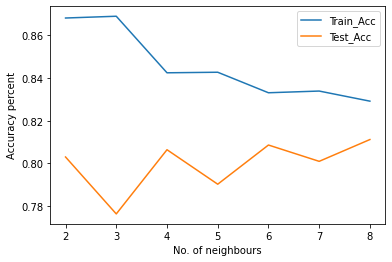

In [220]:
# Training the model using KNeighbor algorithm by varying no.of Neighbors from 2 to 9
from sklearn.neighbors import KNeighborsClassifier
train_acc_array=[]
test_acc_array=[]
for i in range(2,9):
  kmodel = KNeighborsClassifier(n_neighbors = i)
  kmodel.fit(x_train,y_train)
  pre_train = kmodel.predict(x_train)
  train_acc_array.append((pre_train == y_train).sum()/len(y_train))
  pre_test = kmodel.predict(x_test)
  test_acc_array.append((pre_test == y_test).sum()/len(y_test))


# plotting a graph of Training and test accuracies varying the number of neighbours

plt.plot(np.arange(2,9) , train_acc_array , label= 'Train_Acc')
plt.plot(np.arange(2,9) , test_acc_array , label = 'Test_Acc')
plt.xlabel('No. of neighbours')
plt.ylabel('Accuracy percent')
plt.legend()

In [221]:
# From the above graph we came to know that the best train and test accuracies are at n=7
kmodel = KNeighborsClassifier(n_neighbors= 6)

# fit the model
kmodel.fit(x_train, y_train)

# Calculate and print the scores
print("Training Accuracy is", kmodel.score(x_train, y_train))
print("Test Accuracy is", kmodel.score(x_test, y_test))

# storing these accuracies in some variables
kmodel_tr_acc=kmodel.score(x_train,y_train)
kmodel_te_acc=kmodel.score(x_test,y_test)

Training Accuracy is 0.8330857142857143
Test Accuracy is 0.8086333333333333


After training my model with KNeighbor algorithm the final training and test accuracies are 83.30% and 80.86%

LOGISTIC REGRESSION ALGORITHM

In [216]:
# importing the logistic regression algorithm
#importing the algorithm
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

# fitting the training data
LR.fit(x_train,y_train)

# printing the training accuracy and test accuracy
print('Training accuracy is',LR.score(x_train,y_train))
print('Testing accuracy is',LR.score(x_test,y_test))


# storing these accuracies in some variables
LR_tr_acc=LR.score(x_train,y_train)
LR_te_acc=LR.score(x_test,y_test)

Training accuracy is 0.774
Testing accuracy is 0.7727


After training my model with Logistic Regression algorithm the final training and test accuracies are 77.4% and 77.27%

Note : The difference between these accuracies is very less which is a good sign to go further.

SVM ALGORITHM

In [222]:
#importing the SVM algorithm 
from sklearn.svm import SVC
SVM = SVC()

#fitting the data
SVM.fit(x_train,y_train)

#printing the accuracies.
print(SVM.score(x_train,y_train))
print(SVM.score(x_test,y_test))

#storing the accuracies in some variables

SVM_tr_acc=SVM.score(x_train,y_train)
SVM_te_acc=SVM.score(x_test,y_test)

0.8199428571428572
0.8179


After training my model with SVM algorithm the final training and test accuracies are 81.99% and 81.79% 


RANDOM FOREST ALGORITHM

In [217]:
#importing RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(max_depth=2, n_estimators=10, random_state=0)

# fitting the data
RFC.fit(x_train, y_train)

# print the accuracies
print('Training Accuracy is',RFC.score(x_train, y_train))
print('Test Accuracy is',RFC.score(x_test, y_test))


#storing the accuracies in some variables

RFC_tr_acc=RFC.score(x_train,y_train)
RFC_te_acc=RFC.score(x_test,y_test)

Training Accuracy is 0.8195857142857143
Test Accuracy is 0.8180333333333333


After training my model with Random Forest algorithm the final training and test accuracies are 81.95% and 81.80%


STOCHASTIC GRADIENT DESCENT (SGD)

In [218]:
#importing the algorithm
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(loss="hinge", penalty="l1",alpha = 900,max_iter=375)

#fitting the data
SGD.fit(x_train,y_train)

# print the accuracies
print('Training Accuracy is',SGD.score(x_train, y_train))
print('Test Accuracy is',SGD.score(x_test, y_test))

#storing the accuracies in some variables

SGD_tr_acc=SGD.score(x_train,y_train)
SGD_te_acc=SGD.score(x_test,y_test)

Training Accuracy is 0.774
Test Accuracy is 0.7727


After training my model with SGD algorithm the final training and test accuracies are 77.4% and 77.27%


COMPARISION BETWEEN THESE ALGORITHMS

In [227]:
#comparision of algorithm by plotting a bar chart

model_names = ['KNeighbor' , 'Logistic Regression' , 'SVM' , 'Random Forest' , 'SGD']
tr_acc_list = [kmodel_tr_acc , LR_tr_acc , SVM_tr_acc , RFC_tr_acc , SGD_tr_acc]
te_acc_list = [kmodel_te_acc , LR_te_acc , SVM_te_acc , RFC_te_acc , SGD_te_acc]

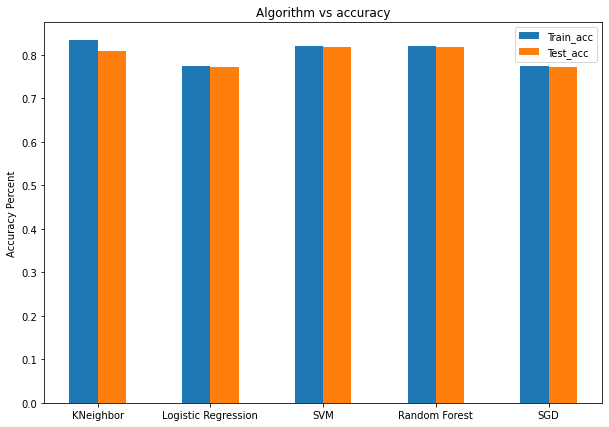

In [251]:
#plotting a bar graph
plt.figure(figsize=(10,7))
ind = np.arange(len(model_names))
width = 0.25
plt.bar(ind,tr_acc_list, width, label='Train_acc')
plt.bar(ind+width,te_acc_list, width, label='Test_acc')
plt.ylabel('Accuracy Percent')
plt.title('Algorithm vs accuracy')
plt.xticks(ind + width / 2, model_names)
plt.legend(loc = 'upper right')
plt.show()

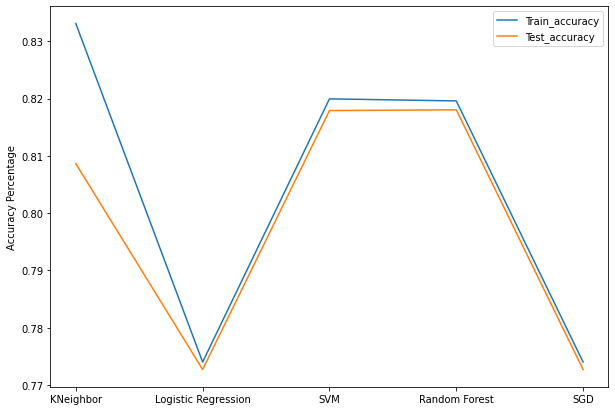

In [252]:
plt.figure(figsize=(10,7))
plt.plot(model_names,tr_acc_list,label='Train_accuracy')
plt.plot(model_names,te_acc_list,label='Test_accuracy')
plt.legend(loc = 'upper right')
plt.ylabel('Accuracy Percentage')
plt.show()

CONCLUSION :


KNeighbor: Training Accuracy - 0.8330   ,     Test Accuracy - 0.8086

Logistic Regression: Training Acc - 0.774     ,     Testing Acc - 0.7727

SVM: Training acc -  0.8199    ,      Testing acc  - 0.8179

RandomForest Classifier: Training Accuracy  -  0.8195, Test Accuracy  - 0.8180

SGD: Training Accuracy   -  0.774, Test Accuracy  -  0.7727



WE CAN CONCLUDE THAT IF WE TRAIN OUR MODEL WITH KNEIGHBOR WE GET THE BEST ACCURACY




PREDICTING THE ORIGINAL TEST DATASET WITH KNEIGHBOR

In [247]:
test_output = kmodel.predict(test_data)
print(test_output)

[0 0 0 ... 0 0 0]


In [248]:
test_output.shape

(10000,)

In [249]:
count=0
for i in range(10000):
  if (test_output[i] == 0):
    count =count + 1
print(count)

9342


AS PER KNEIGHBOR ALGORITHM PREDICTION......OUT OF 10000 CUSTOMERS IN TEST DATASET    9342    CUSTOMERS WILL PAY COMPLETLY AND THE REMAINING    658     CUSTOMERS WILL NOT PAY THE LOAN BACK.